# 1. Perkenalan


* Nama  : Muhammad Itsar Rabbani
* Batch : 006
* Phase 01 Milestone 01
* Objective :
    * Mampu memahami konsep supervised learning
    * Mampu mempersiapkan data untuk digunakan dalam model supervised learning
    * Mampu mengimplementasikan supervised learning dengan data yang diberikan
    * Mampu melakukan evaluasi model
    * Mampu melakukan model tuning


* Dataset from :
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# 2. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier #other algorithm

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tsrrbbn040/dp-draftproject/raw_files/bank-additional-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

**Input variables:**

bank client data:
1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

wow hahaha ya walaupun ada yg statusnya unknown

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 4. Data Cleaning

Pada data cleaning kali ini karena kebanyakan data bersifat object, maka kita pada saat pre-processing harus merubah label pada dataset. Selain itu sesuai atribut info, kita juga akan melakukan drop pada beberapa kolom yang bersfiat marketing yang tidak memiliki pengaruh besar seperti:

* contact
* month, dan
* day of week 

Sedangkan kolom marketing yang memiliki pengaruh besar tidak akan didrop, yakni: 

* duration
* previous
* poutcome

In [6]:
#dropping specific columns
df.drop(['contact', 'month', 'day_of_week'], axis = 1, inplace = True)

# 5. Eksplorasi Data

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


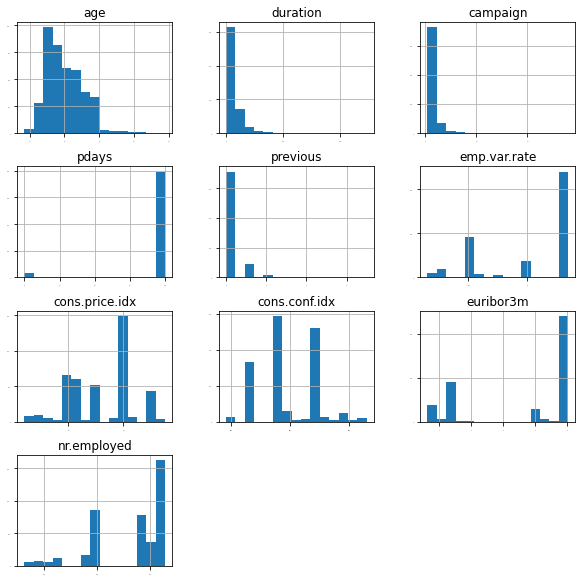

In [8]:
#visual
df.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

Insight sekilas mengenai statistik dari data diatas menunjukkan bahwa populasi data pada kolom-kolom sangatlah timpang. 

Misalnya pada kolom
* Age yang cenderung positive skew.
* Sedangkan kolom sisanya memiliki data yang compang-camping

In [9]:
#checking data target
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

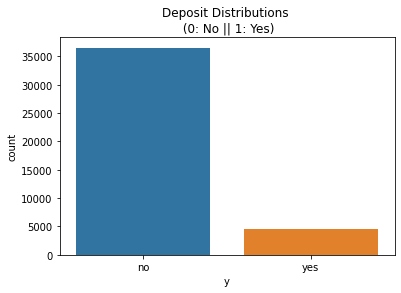

In [10]:
sns.countplot('y', data=df)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=12)

Dari visualisasi di atas dapat kita pastikan bahwa data target sangat tidak balance karena antara No dan Yes berbeda hampir 7x lipat

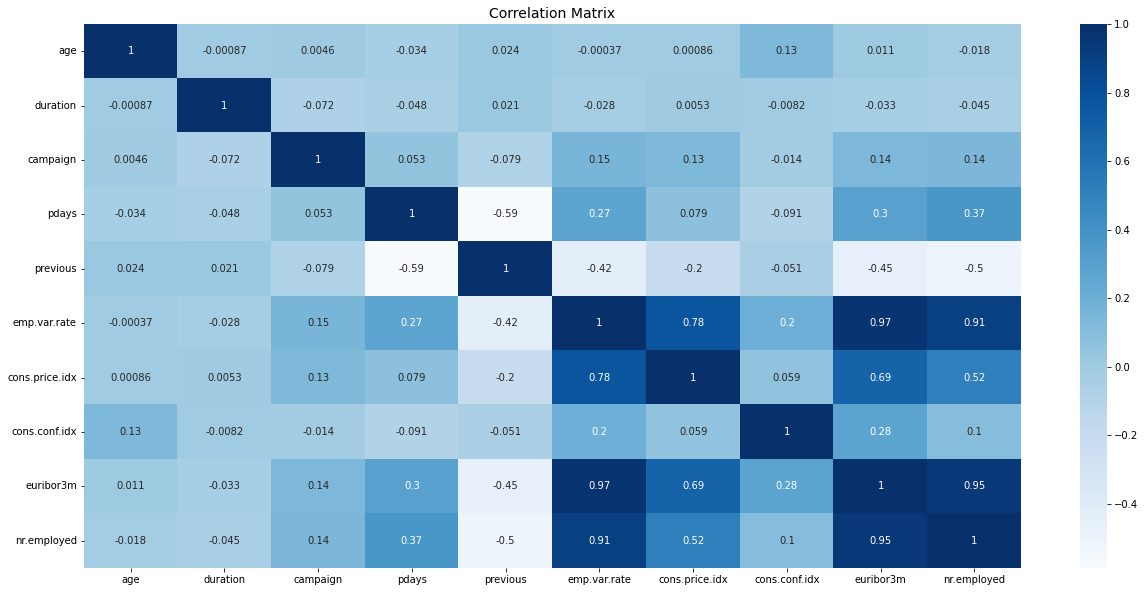

In [11]:
#Heatmap
df.hm = df.corr()
plt.figure(figsize=(21,10))
sns.heatmap(df.hm, cmap="Blues", annot=True)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

Hasil eksplorasi menggunakan heatmap, emp.var.rate, nr.employed, dan euribor3m sangat berkolerasi

# 6. Data Pre-processing

In [12]:
# checking each unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


Dari banyaknya kolom yang berisi data kategorikal, value yang ada pada kolom tersebut bersifat klasifikasi. Jadi selanjutnya kita akan melabelling ulang value pada kolom tersebut

In [13]:
# list of categorical column
categ = ['job','marital','education','default', 'housing', 'loan', 'poutcome']

# from categ to num
dataset = pd.get_dummies(df, columns = categ, drop_first=True)

#changing target value
dataset.y = dataset.y.map({'no':0, 'yes':1})

In [14]:
#sneakpeek after encoding
dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [15]:
#separating data
X = dataset.drop('y', axis=1)
y = dataset['y']

#split between train set-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 0)

# 7. Model Definition


In [16]:
#default model

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()

In [17]:
#LR
model1= lr.fit(X_train, y_train)
#SVC
model2 = svm.fit(X_train, y_train)
#KNN
model3 = knn.fit(X_train, y_train)
#RandomForest
model4 = rf.fit(X_train, y_train)
#DecisionTree
model5 = dt.fit(X_train, y_train)
#NaiveBayes
model6 = nb.fit(X_train, y_train)
#GradientBoost
model7 = gb.fit(X_train, y_train)

# 8. Pelatihan Model

Base Model 1 - LR

In [18]:
#training LR
pred_mod1 = lr.predict(X_test)
mod1_cm = confusion_matrix(y_test, pred_mod1)
mod1_ascore = accuracy_score(y_test, pred_mod1)

#result
print("confussion matrix")
print(mod1_cm)
print("\n")
print("Accuracy of Log. Regression:",mod1_ascore*100,'\n')
print(classification_report(y_test,pred_mod1))


confussion matrix
[[10672   293]
 [  866   526]]


Accuracy of Log. Regression: 90.62070081735048 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10965
           1       0.64      0.38      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.71     12357
weighted avg       0.89      0.91      0.90     12357



Base Model 2 - SVC

In [19]:
#training SVM
pred_mod2 = svm.predict(X_test)
mod2_cm = confusion_matrix(y_test, pred_mod2)
mod2_ascore = accuracy_score(y_test, pred_mod2)

#result
print("confussion matrix")
print(mod2_cm)
print("\n")
print("Accuracy of SVC:",mod2_ascore*100,'\n')
print(classification_report(y_test,pred_mod2))


confussion matrix
[[10784   181]
 [ 1117   275]]


Accuracy of SVC: 89.49583232176094 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10965
           1       0.60      0.20      0.30      1392

    accuracy                           0.89     12357
   macro avg       0.75      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



Base Model 3 - KNN

In [20]:
#training KNN
pred_mod3 = knn.predict(X_test)
mod3_cm = confusion_matrix(y_test, pred_mod3)
mod3_ascore = accuracy_score(y_test, pred_mod3)

#result
print("confussion matrix")
print(mod3_cm)
print("\n")
print("Accuracy of K-NN:",mod3_ascore*100,'\n')
print(classification_report(y_test,pred_mod3))


confussion matrix
[[10507   458]
 [  713   679]]


Accuracy of K-NN: 90.52358986809097 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.60      0.49      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



Base Model 4 - Random Forest

In [21]:
#training Random Forest
pred_mod4 = rf.predict(X_test)
mod4_cm = confusion_matrix(y_test, pred_mod4)
mod4_ascore = accuracy_score(y_test, pred_mod4)

#result
print("confussion matrix")
print(mod4_cm)
print("\n")
print("Accuracy of Random Forest:",mod4_ascore*100,'\n')
print(classification_report(y_test,pred_mod4))


confussion matrix
[[10603   362]
 [  732   660]]


Accuracy of Random Forest: 91.14671845917293 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.65      0.47      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



Base Model 5 - Decision Tree

In [22]:
#training Decision Tree
pred_mod5 = dt.predict(X_test)
mod5_cm = confusion_matrix(y_test, pred_mod5)
mod5_ascore = accuracy_score(y_test, pred_mod5)

#result
print("confussion matrix")
print(mod5_cm)
print("\n")
print("Accuracy of Decision Tree:",mod5_ascore*100,'\n')
print(classification_report(y_test,pred_mod5))

confussion matrix
[[10257   708]
 [  651   741]]


Accuracy of Decision Tree: 89.00218499635834 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.51      0.53      0.52      1392

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



Base Model 6 - Naive Bayes

In [23]:
#training Naive Bayes
pred_mod6 = nb.predict(X_test)
mod6_cm = confusion_matrix(y_test, pred_mod6)
mod6_ascore = accuracy_score(y_test, pred_mod6)

#result
print("confussion matrix")
print(mod6_cm)
print("\n")
print("Accuracy of Naive Bayes:",mod6_ascore*100,'\n')
print(classification_report(y_test,pred_mod6))

confussion matrix
[[9837 1128]
 [ 733  659]]


Accuracy of Naive Bayes: 84.93971028566804 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     10965
           1       0.37      0.47      0.41      1392

    accuracy                           0.85     12357
   macro avg       0.65      0.69      0.66     12357
weighted avg       0.87      0.85      0.86     12357



Base Model 7 - Gradient Boost

In [24]:
#training Gradient Boost
pred_mod7= gb.predict(X_test)
mod7_cm = confusion_matrix(y_test, pred_mod7)
mod7_ascore = accuracy_score(y_test, pred_mod7)

#result
print("confussion matrix")
print(mod7_cm)
print("\n")
print("Accuracy of Gradient Boost:",mod7_ascore*100,'\n')
print(classification_report(y_test,pred_mod7))

confussion matrix
[[10568   397]
 [  643   749]]


Accuracy of Gradient Boost: 91.58371773084082 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



# 9. Evaluasi Model

Evaluasi Model

In [25]:
#Create Dataframe Result of Model
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Rand. Forest', 'Dec Tree', 'Naives Bayes', 'Grad Boost'], 
    'Accuracy Scores': [mod1_ascore, mod2_ascore, mod3_ascore, mod4_ascore, mod5_ascore, mod6_ascore, mod7_ascore]}

result_df = pd.DataFrame(data=d)

In [26]:
#sorting by higher accuracy score
result_df = result_df.sort_values(by=['Accuracy Scores'], ascending=False)
result_df

,Classifiers,Accuracy Scores
6,Grad Boost,0.915837
3,Rand. Forest,0.911467
0,Logistic Reg.,0.906207
2,KNN,0.905236
1,SVC,0.894958
4,Dec Tree,0.890022
5,Naives Bayes,0.849397


Dari dataframe diatas yang berisi nilai score masing-masing model menunjukkan bahwa model yang meraih skor akurasi diatas 90% adalah

1. Gradient Boost
2. Random Forest
3. Logistic Reg, dan
4. KNN

Oleh karena itu dalam processing selanjutnya yakni dilakukan tunning menggunakan Cross Validation dan Grid Search, saya hanya akan melakukan ke salah satu modelnya saja yakni Model Gradient Boost.

Simple Tunning with Pipeline

In [27]:
#scaler
scaler = StandardScaler()

#pipeline
pipe = Pipeline([("scaler", scaler), ("model", gb)])

#fitting pipeline into train data
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [28]:
y_pred = pipe.predict(X_test)

#result
mod_cm = confusion_matrix(y_test, y_pred)
mod_ascore = accuracy_score(y_test, y_pred)
print("GB with Pipeline Accuracy:",mod_ascore,'\n')
print(classification_report(y_test, y_pred))

GB with Pipeline Accuracy: 0.9158371773084082 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



ternyata kalo hanya discaller saja tidak menaikkan akurasi sama sekali dari Model Gradient Boost. selanjutnya kita akan mencoba hyperparameter tunning dari Gradient Boost

In [29]:
gb_hyperparameters = {
    "gradientboostingclassifier__n_estimators": [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [30]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier())
grid = GridSearchCV(pipe,gb_hyperparameters,cv=2, n_jobs=-1)

grid.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.92
Test set score: 0.92
Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 100}


Dari hasil GridSearchCV di atas dapat ditemukan bahwa parameter terbaik jatuh kepada,
* learning rate : 0.1
* max_depth : 3
* n_estimators : 100

Oleh karena itu pada model inference, parameter di model GradientBoost akan ditetapkan sesuai hasil GridSearchCV tadi

In [32]:
#cross_val_score
scores = cross_val_score(grid, X_train, y_train, cv=5)
print(scores.mean())

0.9147792459170464


Hasil cross val score menunjukkan nilai akurasi sebesar 91%

# 10. Model Inference


**Evaluasi Model**

In [33]:
#pipeline model for inference
inf_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1))

#fit
inf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [34]:
pred = inf_pipe.predict(X_test)

#result
mod_ascore = accuracy_score(y_test, pred)
print("GB with Pipeline Accuracy:",mod_ascore,'\n')
print(classification_report(y_test, pred))

GB with Pipeline Accuracy: 0.9158371773084082 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [35]:
#Showing Actual & Predicted
inference = pd.DataFrame({'Actual': y_test,'Predicted': pred})
inference

,Actual,Predicted
38865,0,1
28259,0,0
16427,0,0
701,0,0
20210,0,0
...,...,...
39869,1,1
12146,0,0
12600,0,0
25044,0,0


In [36]:
#Another Inference
'''
Nasabah si C :

age : 40
duration : 500
campaign : 3
pdays : 999
previous : 0
emp.var.rate : 1.0
cons.price.idx : 93.800
cons.conf.idx : -15.2
euribor3m : 1.550
nr.employed : 5500.0
job : entrepreneur
marital : married
education : professional course
default : yes
housing : unknown
loan : yes
poutcome : success

'''
nasabah = np.array([[40, 500, 3, 999, 0, 1.0, 93.800, -15.2, 1.550, 5500.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]])
pred = inf_pipe.predict(nasabah)
if pred == 1:
    print(">> More likely to make term Deposit")
else:
    print(">> Less likely to make term Deposit")

>> More likely to make term Deposit


# 11. Conclusion

1. Dari tujuh jenis model yang digunakan, GradientBoostClassifier memiliki nilai akurasi yang lebih mengesankan sehingga saya memilih untuk menggunakan model tersebut
2. Setelah dilakukan scalling dan hyperparameter tunning nilai akurasi hanya meningkat sedikit dari yang sebagai berikut :
    * Base Model GBC : 91.58371
    * Improved Model GBC : 91.59181
3. Teruntuk pihak Bank, dari data yang dimiliki dapat saya simpulkan bahwa nasabah akan cenderung melakukan deposit jika :
  * durasi telp terhadap pelanggan dinilai baik
  * dan berdasarkan poutcome atau hasil campaign marketing yang dilakukan terbilang sukses
4. Oleh karena itu untuk memenuhi target marketing Bank, saya menyarankan untuk mencari titik optimum kinerja marketing. Baik itu dari promo bebas biaya admin, bunga lebih tinggi, dan lain sebagainya.
5. Hal lain yang dapat dilakukan diantaranya menaikkan intensitas marketing pada bulan-bulan tertentu yang dimana seorang pegawai atau pengusaha mendapatkan gaji dobel. Misal diakhir bulan puasa karena mayoritas pekerja mendapatkan bonus gaji berupa THR dan lain sebagainya.